# Exercise Set 7


## Mohaddeseh Mozaffari

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

# Random walk:

# A:

![image](/home/mohaddeseh/Documents/Programing/Computational/HW7/1.jpg)

In [3]:
N = 10000
M = 1000
T = np.linspace(0,100,N)
dt = T[1] - T[0]

In [4]:
def RW_flat(p, N ,M):
    """random walk with step probability is flat

    Args:
        p (float): probability
        N (int): number of time steps
        M (int): number of ensemble

    Returns:
        2d_array: (M,N)
    """
    x = np.zeros((M,N))
    for ens in range(M):
        for t in range(1,N):
                r = np.random.random()
                dx = np.random.random()
                if r<= p:
                    x[ens,t] = x[ens,t-1] + dx
                else:
                    x[ens,t] = x[ens,t-1] - dx
    return x

In [235]:
X = RW_flat(0.5, 1000, 10000)

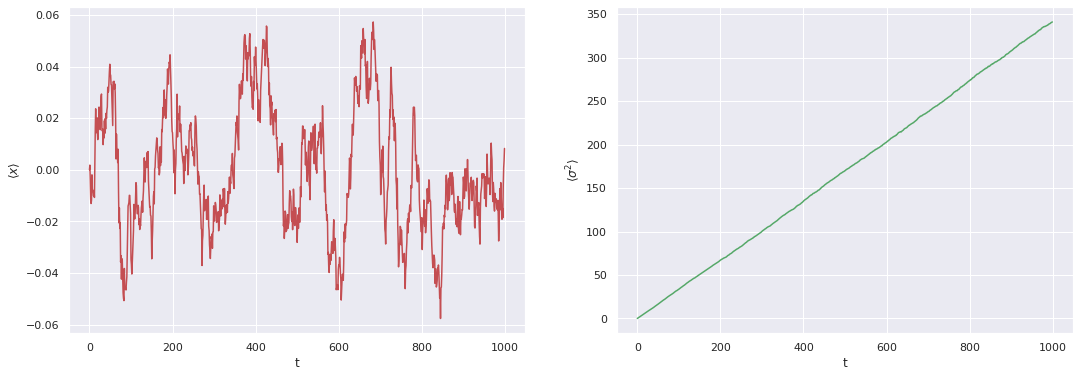

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

axes[0].plot(X.mean(axis=0), color="r")
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle x \rangle$")

axes[1].plot(X.var(axis=0), color="g")
axes[1].set_xlabel("t")
axes[1].set_ylabel(r"$\langle \sigma^2 \rangle$")

plt.show()

# B:

In [7]:
def RW_guassian(p, sigma, N ,M):
    """random walk with probability of stpe is guassian

    Args:
        p (float): probability
        sigma (float): standar deviation of guassian
        N (int): number of time steps
        M (int): number of ensemble

    Returns:
        2d_array: (M,N)
    """
    x = np.zeros((M,N))
    for ens in range(M):
        for t in range(1,N):
                r = np.random.random()
                dx = np.random.normal(0,sigma)
                if r<= p:
                    x[ens,t] = x[ens,t-1] + dx
                else:
                    x[ens,t] = x[ens,t-1] - dx
    return x

### σ = 0.1

In [8]:
X1 = RW_guassian(0.5, 0.1, 1000, 10000)

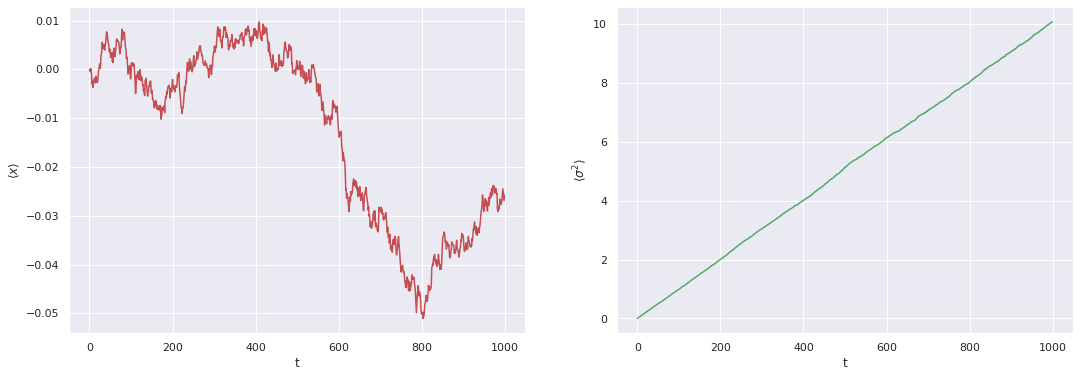

In [9]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

axes[0].plot(X1.mean(axis=0), color="r")
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle x \rangle$")

axes[1].plot(X1.var(axis=0), color="g")
axes[1].set_xlabel("t")
axes[1].set_ylabel(r"$\langle \sigma^2 \rangle$")

plt.show()

###  σ = 1

In [10]:
X2 = RW_guassian(0.5, 1, 1000, 10000)

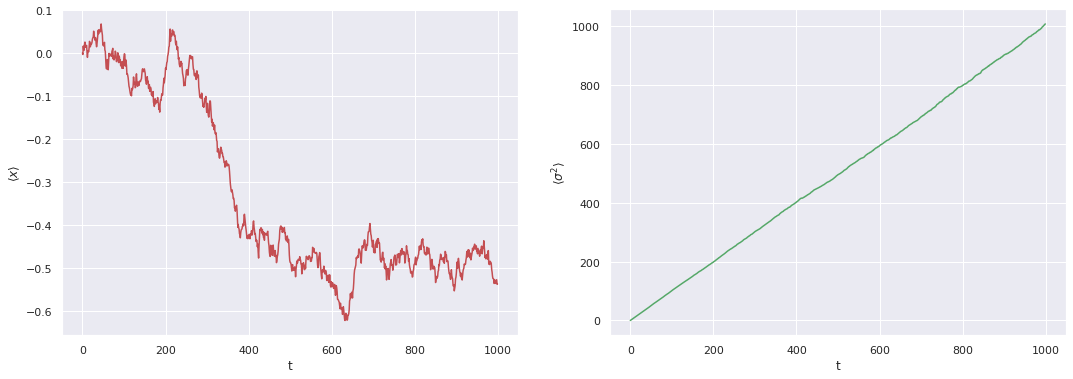

In [11]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

axes[0].plot(X2.mean(axis=0), color="r")
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle x \rangle$")

axes[1].plot(X2.var(axis=0), color="g")
axes[1].set_xlabel("t")
axes[1].set_ylabel(r"$\langle \sigma^2 \rangle$")

plt.show()

###  σ = 10

In [12]:
X3 = RW_guassian(0.5, 10, 1000, 10000)

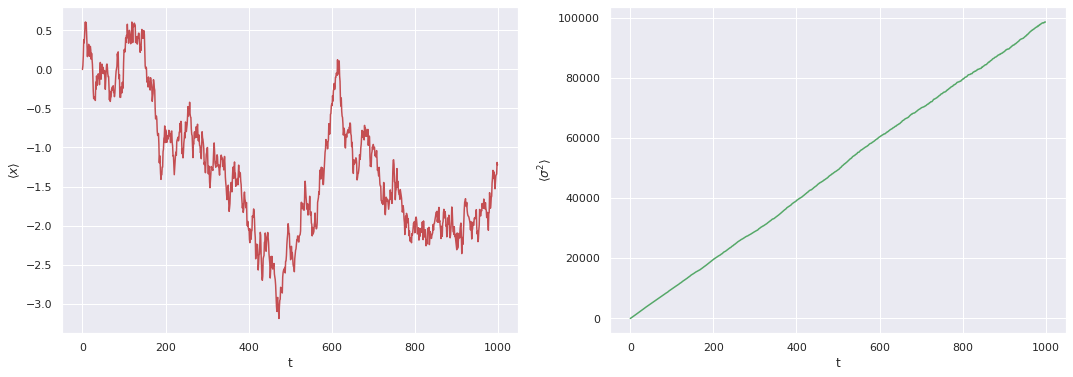

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

axes[0].plot(X3.mean(axis=0), color="r")
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle x \rangle$")

axes[1].plot(X3.var(axis=0), color="g")
axes[1].set_xlabel("t")
axes[1].set_ylabel(r"$\langle \sigma^2 \rangle$")

plt.show()

# C:

In [14]:
def p_tanh(n):
    """random number from tanh(s)/s

    Args:
        n (int): number od random variable we want

    Returns:
        list: list of random variable
    """
    ps = []
    while len(ps) <= n:
        x = np.random.uniform(-4,4)
        y = np.random.uniform(0,1)
        yp = np.tanh(x)/x
        if y<= yp:
            ps.append(x)
    return ps

In [15]:
def RW_tanh(p, N ,M):
    """random walk with probability of stpe is tanh(s)/s

    Args:
        p (float): probability
        sigma (float): standar deviation of guassian
        N (int): number of time steps
        M (int): number of ensemble

    Returns:
        2d_array: (M,N)
    """
    x = np.zeros((M,N))
    for ens in range(M):
        for t in range(1,N):
                r = np.random.random()
                dx = p_tanh(1)[0]
                if r<= p:
                    x[ens,t] = x[ens,t-1] + dx
                else:
                    x[ens,t] = x[ens,t-1] - dx
    return x

In [16]:
Xt = RW_tanh(0.3, 1000, 10000)

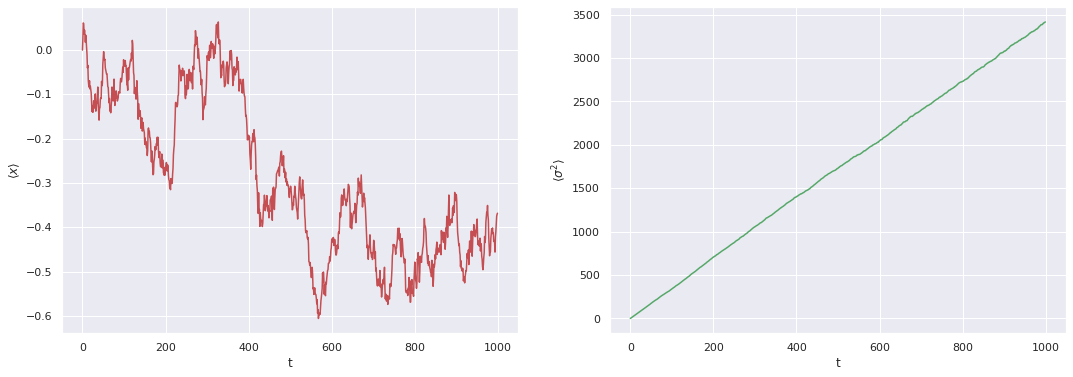

In [17]:
fig, axes = plt.subplots(1, 2, figsize=(18,6))

axes[0].plot(Xt.mean(axis=0), color="r")
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle x \rangle$")

axes[1].plot(Xt.var(axis=0), color="g")
axes[1].set_xlabel("t")
axes[1].set_ylabel(r"$\langle \sigma^2 \rangle$")

plt.show()

# D:

## t = 10

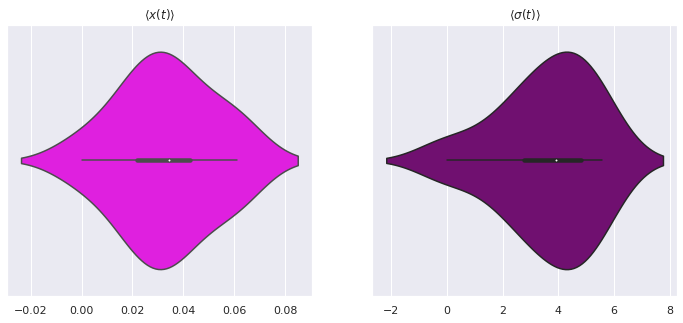

In [18]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.violinplot(x=Xt.mean(axis=0)[:10], ax=axes[0], color="magenta")
axes[0].set_title(r"$\langle x(t) \rangle$")

sns.violinplot(x=Xt.std(axis=0)[:10], ax=axes[1], color="purple")
axes[1].set_title(r"$\langle \sigma(t) \rangle$")

plt.show()

## t = 100

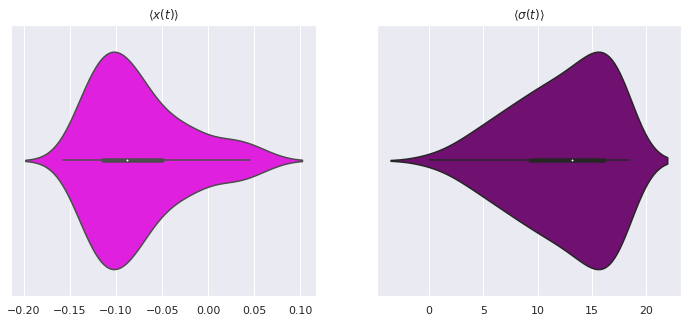

In [19]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.violinplot(x=Xt.mean(axis=0)[:100], ax=axes[0], color="magenta")
axes[0].set_title(r"$\langle x(t) \rangle$")

sns.violinplot(x=Xt.std(axis=0)[:100], ax=axes[1], color="purple")
axes[1].set_title(r"$\langle \sigma(t) \rangle$")

plt.show()

## t = 1000

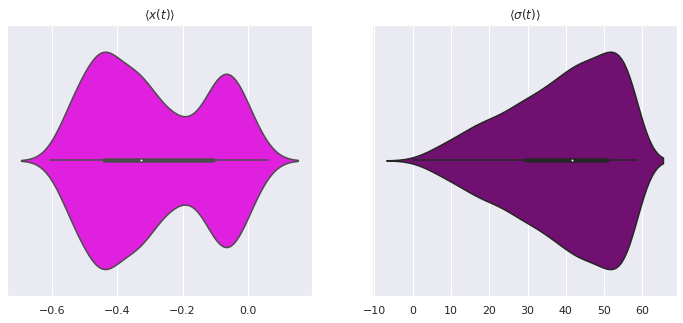

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))
sns.violinplot(x=Xt.mean(axis=0)[:1000], ax=axes[0], color="magenta")
axes[0].set_title(r"$\langle x(t) \rangle$")

sns.violinplot(x=Xt.std(axis=0)[:1000], ax=axes[1], color="purple")
axes[1].set_title(r"$\langle \sigma(t) \rangle$")

plt.show()

The violin plot shows the PDF, median, and 4 quartiles of data.

# F:

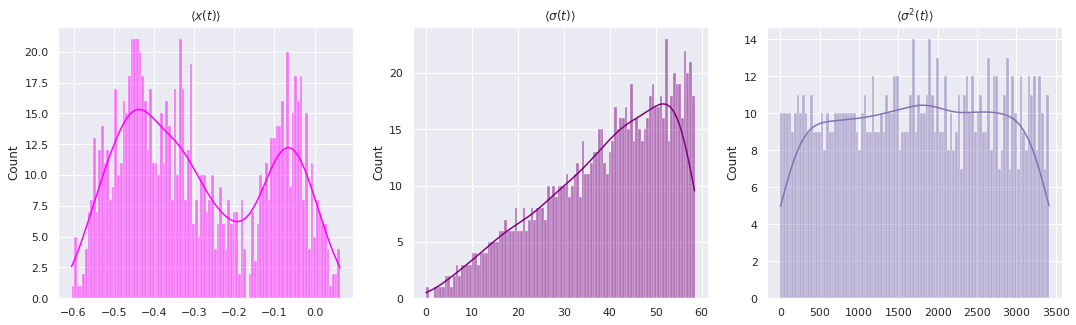

In [127]:
fig, axes = plt.subplots(1, 3, figsize=(18,5))

sns.histplot(Xt.mean(axis=0), kde=True, bins=100, ax=axes[0], color="magenta")
axes[0].set_title(r"$\langle x(t) \rangle$")

sns.histplot(Xt.std(axis=0), kde=True, bins=100, ax=axes[1], color="purple")
axes[1].set_title(r"$\langle \sigma(t) \rangle$")

sns.histplot(Xt.var(axis=0), kde=True, bins=100, ax=axes[2], color="m")
axes[2].set_title(r"$\langle \sigma^2(t) \rangle$")
plt.show()

As we can see, The PDF of data is the same as the violin plots where we plotted in parts D and E.

# Langevin particle:

In [4]:
#set constant number
g = 1
ksi = 1
v_0 = 0
x_0 = 0
N = 10000
nens = 1000

In [5]:
T = np.linspace(0,1000,N)
dt = T[1] - T[0]
V , X = [], []

In [6]:
for e in range(nens):
    v = np.zeros(N)
    x = np.zeros(N)
    v[0] = v_0
    x[0] = x_0
    for t in range(N):
        r1, r2 = np.random.random(2)
        eta = np.sqrt(-2*np.log(r1))*np.cos(2*np.pi*r2) * 2* g
        v[t] = v[t-1] - ksi*v[t-1]* dt + eta*(dt)**(0.5)
        x[t] = x[t-1] + v[t]*dt
    V.append(v)
    X.append(x)

In [7]:
V = np.array(V)
X = np.array(X)

## A:$〈v(t)〉$

In [13]:
meanV = np.mean(V, axis=0)

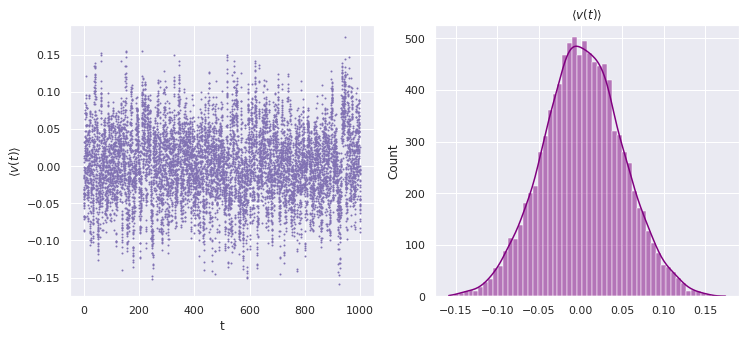

In [14]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(T, meanV, color="m",s=1)
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle v(t)\rangle$")

sns.histplot(meanV, kde=True, ax=axes[1], color="purple")
axes[1].set_title(r"$\langle v(t)\rangle$")
plt.show()

## B: $〈v(t)^2〉$

In [15]:
meanV2 = np.mean(V**2, axis=0)

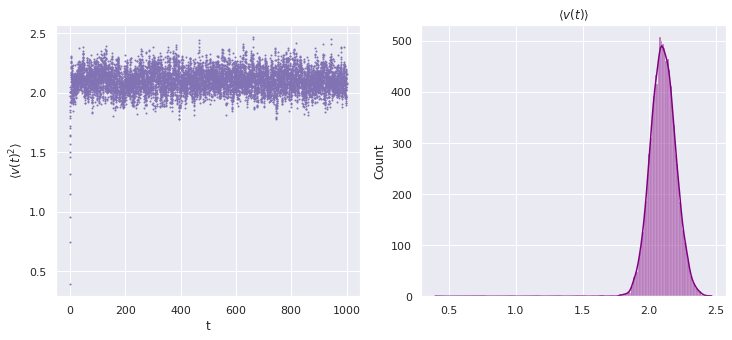

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(T, meanV2, color="m",s=1)
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle v(t)^2\rangle$")

sns.histplot(meanV2, kde=True, ax=axes[1], color="purple")
axes[1].set_title(r"$\langle v(t)\rangle$")
plt.show()

## C: $〈v(t_1)v(t_2)〉$

In [17]:
Meanvv = np.zeros((N,N))
for tau in range(N):
    for t in range(N-tau):
        vv = np.mean(V[:,t]*V[:,t+tau])
        Meanvv[tau,t] = vv

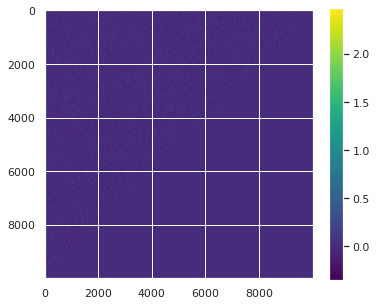

In [18]:
plt.figure(figsize=(6,5))
plt.imshow(Meanvv, cmap="viridis")
plt.colorbar()
plt.show()

## D:$〈x(t)〉$

In [19]:
meanX= np.mean(X, axis=0)

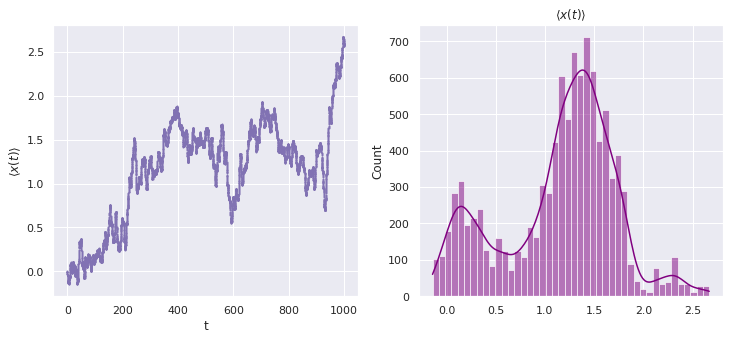

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(T, meanX, color="m",s=1)
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle x(t)\rangle$")

sns.histplot(meanX, kde=True, ax=axes[1], color="purple")
axes[1].set_title(r"$\langle x(t)\rangle$")
plt.show()

## E:$〈x(t)^2〉$

In [21]:
meanX2= np.mean(X**2, axis=0)

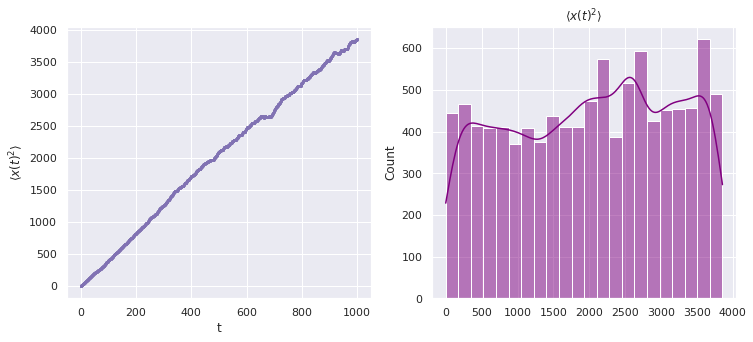

In [22]:
fig, axes = plt.subplots(1, 2, figsize=(12,5))

axes[0].scatter(T, meanX2, color="m",s=1)
axes[0].set_xlabel("t")
axes[0].set_ylabel(r"$\langle x(t)^2\rangle$")

sns.histplot(meanX2, kde=True, ax=axes[1], color="purple")
axes[1].set_title(r"$\langle x(t)^2\rangle$")
plt.show()

## F:$〈x(t_1)x(t_2)〉$

In [23]:
Meanxx = np.zeros((N,N))
for tau in range(N):
    for t in range(N-tau):
        xx = np.mean(X[:,t]*X[:,t+tau], axis=0)
        Meanxx[tau,t] = xx

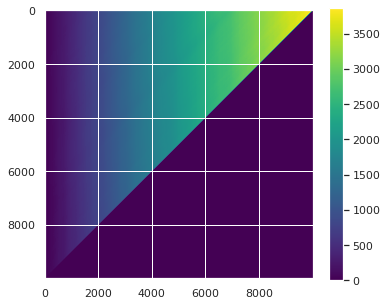

In [24]:
plt.figure(figsize=(6,5))
plt.imshow(Meanxx, cmap="viridis")
plt.colorbar()
plt.show()

## G: $p(v)$

In [25]:
def _int(x):
    """calculate integer part of the number 
    example:
        _float(-0.5) = -1

    Args:
        x (float): 

    Returns:
        int: 
    """
    if x>= 0:
        return int(x)
    else:
        return int(x) -1

In [26]:
def PDF(X,dx):
  """probability of data

  Args:
      X (1d_array): data
      dx (float): size of steps

  Returns:
      tuple: axis of probability and probability --> x, p(x)
  """
  n = int((X.max()-X.min())/dx) + 1
  
  axis = np.linspace(X.min(), X.max(), n)

  pdf = np.zeros(n)

  X -= X.min()

  for i in range(len(X)):
    k = _int(X[i]/dx)
    pdf[k] += 1     

  pdf /= (np.sum(pdf)*dx)  

  return axis,pdf 

In [27]:
axis,pdf = PDF(meanV, 0.01) 

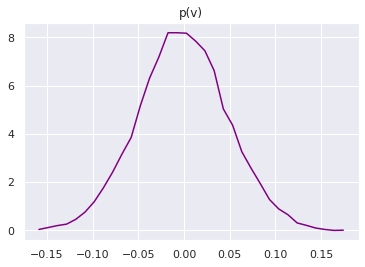

In [28]:
plt.plot(axis,pdf, color="purple")
plt.title("p(v)")
plt.show()

## H: Compare all of above parts with theoretical predictions.

![image](/home/mohaddeseh/Documents/Programing/Computational/HW7/2.jpg)

## I: $p(v(t); v(t + τ )).$ What happens if $τ → ∞$

In [29]:
def p_joint(x, y, dx, dy, nx=0, ny=1, tau=0):
    """calculate joint probablity --> p(x(t+nx*tau),y(t+ny*tau))

    Args:
        x (1d_array): first data
        y (1d-array): second data
        dx (float): size of steps for x data
        dy (float): size of steps for y data
        nx (int, optional): coefficient of tau for x. Defaults to 0.
        ny (int, optional): coefficient of tau for x. Defaults to 1.
        tau (int, optional): delay time. Defaults to 0.
    Returns:
        2d_array: joint probability of x,y
    """

    numx = int((x.max()-x.min())/dx)+1
    numy = int((y.max()-y.min())/dy)+1

    pdf = np.zeros((numx, numy))

    x -= x.min()
    y -= y.min()

    for i in range(len(x)- np.max((nx,ny))*tau):
        k1 = _int(x[i+(nx*tau)]/dx)
        k2 = _int(y[i+(ny*tau)]/dy)
        pdf[k1,k2] += 1

    return pdf/(np.sum(pdf)*dx*dy)

In [30]:
p1 = p_joint(meanV, meanV, 0.01, 0.01, 0, 1, tau=1)
p10 = p_joint(meanV, meanV, 0.01, 0.01, 0, 1, tau=10)
p100 = p_joint(meanV, meanV, 0.01, 0.01, 0, 1, tau=100)
p1000 = p_joint(meanV, meanV, 0.01, 0.01, 0, 1, tau=1000)
p5000 = p_joint(meanV, meanV, 0.01, 0.01, 0, 1, tau=5000)
pf = p_joint(meanV, meanV, 0.01, 0.01, 0, 1, tau=9999)

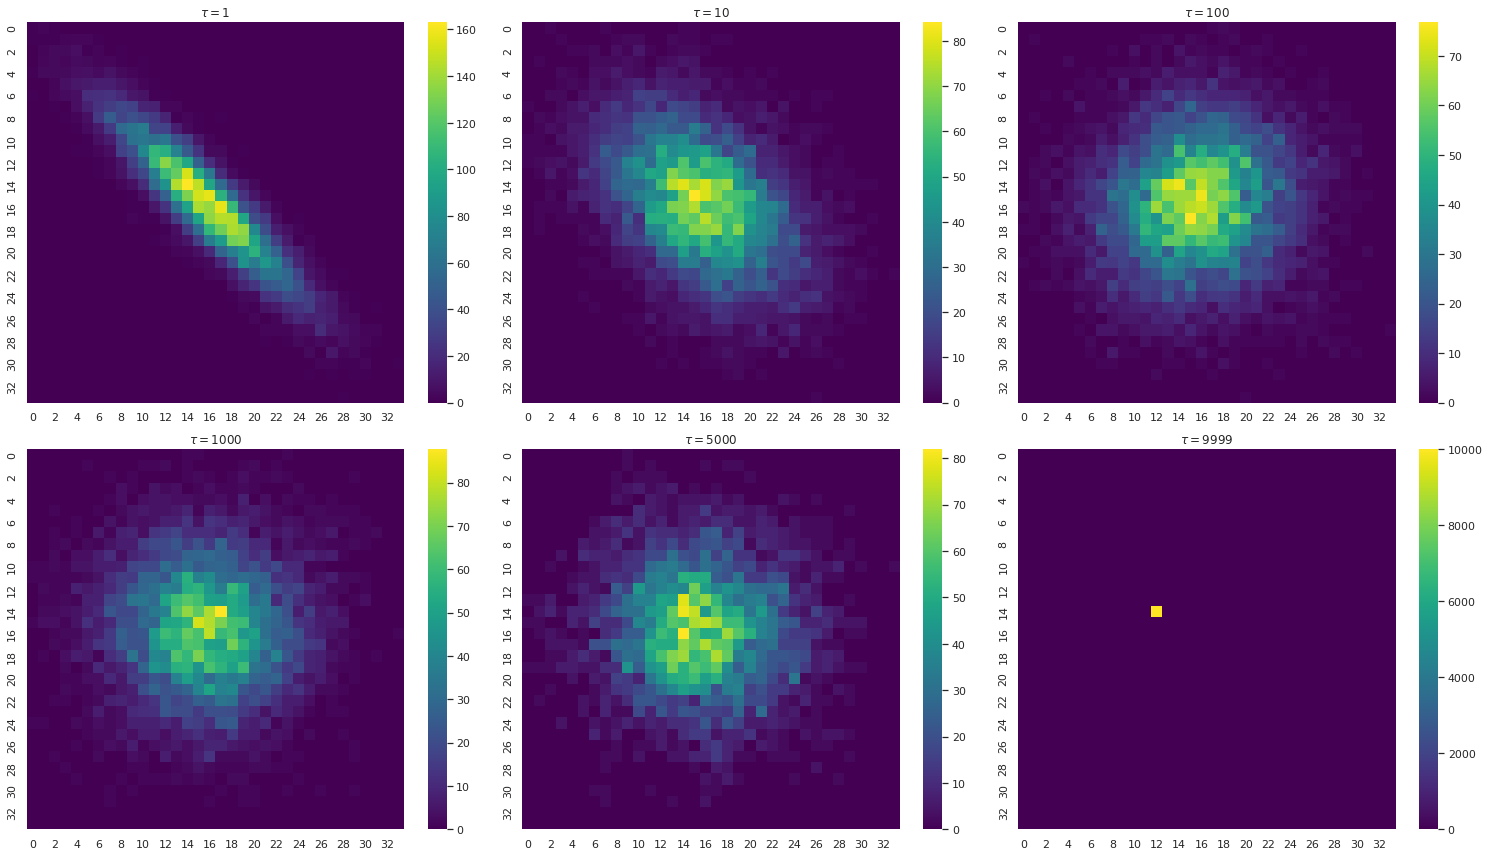

In [31]:
fig, axes = plt.subplots(2, 3, figsize=(21,12))

sns.heatmap(p1, cmap="viridis", ax=axes[0,0])
axes[0,0].set_title(r"$\tau = 1$")

sns.heatmap(p10, cmap="viridis", ax=axes[0,1])
axes[0,1].set_title(r"$\tau = 10$")

sns.heatmap(p100, cmap="viridis", ax=axes[0,2])
axes[0,2].set_title(r"$\tau = 100$")

sns.heatmap(p1000, cmap="viridis", ax=axes[1,0])
axes[1,0].set_title(r"$\tau = 1000$")

sns.heatmap(p5000, cmap="viridis", ax=axes[1,1])
axes[1,1].set_title(r"$\tau = 5000$")

sns.heatmap(pf, cmap="viridis", ax=axes[1,2])
axes[1,2].set_title(r"$\tau = 9999$")

plt.tight_layout()
plt.show()

$\lim_{τ → ∞} p(v(t); v(t + τ ))$ is all zero except one point.